Best Q in complexity 1 :  4079.8238363494497
Best Q in complexity 2 :  3386.767584518104
Best Q in complexity 3 :  3150.400545556058
Best Q in complexity 4 :  3067.1077629354622
Best Q in complexity 5 :  2993.7716019681525
Best Q in complexity 6 :  2891.1040287312335
Best Q in complexity 7 :  2891.3867193172177
Best Q in complexity 8 :  2903.67936807411
Best Q in complexity 9 :  2922.9510945817924
Best Q: 2891.1040287312335


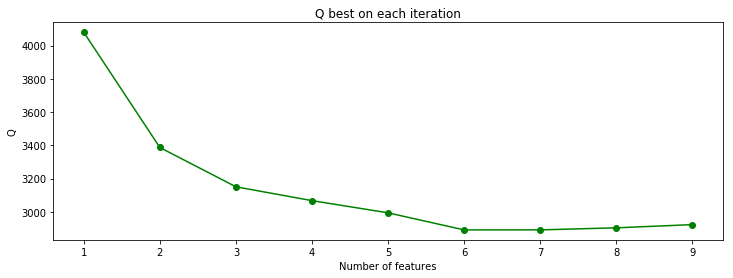

Features: SEX BMI BP S1 S2 S5 


In [3]:
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
import optunity.metrics as metrics
from sklearn.neural_network import MLPRegressor as mlpr
from pylab import rcParams
import pandas as pd
import data_preprocessor
import random
import copy
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib
import matplotlib.animation as animation
import matplotlib.patches as patches
from pylab import rcParams

class Q_Criterion:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        
        self.X_test = X_test
        self.y_test = y_test
        
    def get_list_of_indexes_by_bitmask(self, bitmask):
        ls = []
        for i in range(len(bitmask)):
            if bitmask[i] == 1:
                ls.append(i)
                
        return ls 
    
    def calc_Q(self, feature_bitmask):
        list_of_features = self.get_list_of_indexes_by_bitmask(feature_bitmask)
        
        model = LinearRegression()
        model.fit(self.X_train[:, list_of_features], self.y_train)
        
        y_hat = model.predict(self.X_test[:, list_of_features])
        Q = metrics.mse(y_hat, self.y_test)
        return Q
        
        
class BFS:
    def __init__(self):
        return
            
    # -------------------------------------------------------------------------
    
    
    def draw_Q(self, Q):
        plt.plot(np.arange(1, len(Q)+1), Q, 'ro-', color = 'green', label = 'min Q')

        plt.xlabel('Number of features')
        plt.ylabel('Q')
        plt.title('Q best on each iteration')   
        
        plt.rcParams["figure.figsize"] = (12, 4)
        
        plt.show()
    
    # ------------------------------------------------------------------------- 
    
    def fit(self, X_train, y_train, q_criterion, d, B):
        n = len(X_train[0])
        self.INF = 2E9
        
        R = []
        
        Q_best_in_each_complexity = []
        j_sharp = 1
        best_F = []
        Q_best = self.INF
        
        # init set (compexity 1) 
        for k in range(n):
            obj = [0]*n
            obj[k] = 1
            R.append(obj)
            
        for j in range(1, n+1):
            Q = []
            for i in range(len(R)):
                Q.append(q_criterion.calc_Q(R[i]))
                
            R = [x for _,x in sorted(zip(Q, R))]
            
            Q = []
            for i in range(len(R)):
                Q.append(q_criterion.calc_Q(R[i]))
                
            if len(R) > B:
                R = copy.deepcopy(R[:B])
                
            print('Best Q in complexity', j, ': ', Q[0])
            
            Q_best_in_each_complexity.append(Q[0])
            
            if Q[0] < Q_best:
                Q_best = copy.deepcopy(Q[0])
                j_sharp = j
                best_F = R[0]
            
            
            if j-j_sharp >= d:
                print('Best Q:', q_criterion.calc_Q(best_F))
                self.draw_Q(Q_best_in_each_complexity)
                return best_F
            
            R_new = []
            
            for i in range(len(R)):
                for k in range(n):
                    if R[i][k] == 0:
                        new_obj = copy.deepcopy(R[i])
                        new_obj[k] = 1
                        R_new.append(new_obj)
                        
            R = copy.deepcopy(R_new)
            
            
        print('Best Q:', q_criterion.calc_Q(best_F))
        self.draw_Q(Q_best_in_each_complexity)
        return best_F
        
        
    # -------------------------------------------------------------------------
            
def print_feature_names(F, names_of_features):
    print('Features:', end = ' ')
    for i in range(len(F)):
        if F[i] == 1:
            print(names_of_features[i], end = ' ')
    print()
    
        
def main():
    dp = data_preprocessor.Data_Preprocessor()
    X_train, y_train, X_test, y_test, names_of_features = dp.Prepare_data('diabetes')
    
    q_criterion = Q_Criterion(X_train, y_train, X_test, y_test)
    
    bfs = BFS()
    F = bfs.fit(X_train, y_train, q_criterion, d = 3, B = 20)    
    
    print_feature_names(F, names_of_features)
    
    
main()     